<a href="https://colab.research.google.com/github/JinMizar/ds3001_final_project/blob/main/result_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/JinMizar/ds3001_final_project.git

Cloning into 'ds3001_final_project'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 57 (delta 24), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 954.38 KiB | 8.68 MiB/s, done.
Resolving deltas: 100% (24/24), done.


# Result: DS3001 Final Project
**Team Members**: Jinhong Zhao, Tong Zhou, Hanna Svenson

---
### Prediction Question
**Which chemical properties of Portuguese red wine are most predictive of high-quality wine (scores 7 and 8)?**

Our analysis aims to provide actionable insights for wine producers and consumers by identifying the chemical properties most strongly associated with high-quality wines and evaluating the predictive accuracy of our classification model.


In [11]:
#Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, matthews_corrcoef, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV


In [6]:
df = pd.read_csv('ds3001_final_project/data/WineQT.csv')

# Categorize quality into binary classification
def categorize_quality(rating):
    return 1 if rating >= 7 else 0  # High-quality = 1, Not high-quality = 0

df['quality_binary'] = df['quality'].apply(categorize_quality)

# Split data
X = df.drop(columns=['quality', 'quality_binary'])  # Remove only the relevant columns
y = df['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for PCA and Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


As mention from the pre-analysis, We consider using Lasso regression in the later analysis to minimize the impact of correlated variables and identify the most important chemical properties.

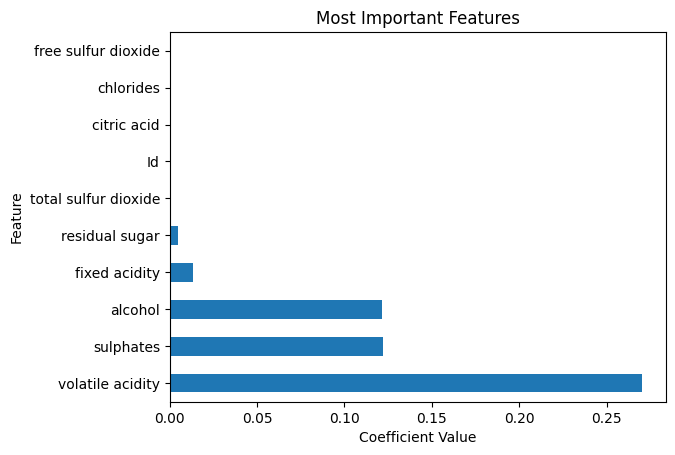

In [13]:
lasso = LassoCV(cv=5).fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index=X.columns)

# Plot top features
top_features = coef.abs().sort_values(ascending=False).head(10)
top_features.plot(kind='barh')
plt.title("Most Important Features")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()